Attempt at finding clusters in the events of GENIE16_CH datasets

In [1]:
import mhn
import numpy as np
import pandas as pd
import os
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

import mhn_tools as mytools
import checkpoints_mbonart as cp
import EventDistanceMeasurer as edm

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(999)
file_names=["G16_CH_BLCA_Events.csv", "G16_CH_COAD_Events.csv", "G16_CH_LUAD_Events.csv", "CHORD_COAD_clinical_Events_reduced.csv", "G16_CH_PRAD_Events.csv"]
dat_index=3
file_path=os.path.join( os.getcwd(), '..','data', file_names[dat_index] )
raw_data_input = pd.read_csv(file_path)
print(raw_data_input.columns.str)
print(raw_data_input.columns.str.endswith(')'))
#data_input.drop(columns=data_input.columns.str.endswith(')'), inplace =True)
data_input=raw_data_input.loc[:, raw_data_input.columns.str.endswith(')')]
events=list(data_input.columns)[1:]
print(events)


[False  True  True  True  True False False  True  True  True  True False
  True  True  True  True  True  True False  True False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False]
['TP53 (M)', 'ASXL1/20q (Amp)', 'SMAD4/18q (Del)', 'FLT3/13q (Amp)', 'KRAS (M)', 'RAC1/7p (Amp)', 'TP53/17p (Del)', 'FBXW7/4q (Del)', 'ARID1A/1p (Del)', 'PIK3CA (M)', 'B2M/15q (Del)', 'MAPK3/16p (Amp)', 'PRKD1/14q (Del)', 'FBXW7 (M)', 'BRAF (M)', 'ARID1A (M)', 'RNF43 (M)', 'SOX9 (M)', 'KMT2D (M)', 'SMAD4 (M)', 'PTPRS (M)', 'CTNNB1 (M)', 'ATM (M)', 'AMER1 (M)', 'CREBBP (M)', 'PTEN (M)', 'FAT1 (M)', 'KMT2C (M)', 'TGFBR2 (M)', 'NOTCH3 (M)', 'B2M (M)', 'SPEN (M)', 'MSH6 (M)', 'KMT2A (M)', 'PTCH1 (M)', 'BCOR (M)', 'ASXL1 (M)', 'PIK3R1 (M)', 'SMARCA4 (M)', 'MTOR (M)', 'PTPRT (M)', 'NOTCH1 (M)', '

Here we use the same algorithm but with 4 test events (the 3 from before and KRAS)

Analyse dataset for test events chosen by biological function

<>:36: SyntaxWarning: invalid escape sequence '\{'
<>:36: SyntaxWarning: invalid escape sequence '\}'
<>:36: SyntaxWarning: invalid escape sequence '\{'
<>:36: SyntaxWarning: invalid escape sequence '\}'
C:\Users\michi\AppData\Local\Temp\ipykernel_16040\1752065250.py:36: SyntaxWarning: invalid escape sequence '\{'
  print("\{\\text{"+', '.join(tes)+"}\}")
C:\Users\michi\AppData\Local\Temp\ipykernel_16040\1752065250.py:36: SyntaxWarning: invalid escape sequence '\}'
  print("\{\\text{"+', '.join(tes)+"}\}")


\{\text{TP53 (M), SMAD4 (M), SMAD4/18q (Del)}\}
\{\text{FAT1 (M), KRAS (M), BRAF (M)}\}
\{\text{MAPK3/16p (Amp), MTOR (M)}\}
0x1.571e59877a77ap+62
Directory for storage is edm_no_init_theta571e59877a77a/TP53M_SMAD4M_SMAD418qDel
check if mbonart_checkpoints/edm_no_init_theta571e59877a77a/TP53M_SMAD4M_SMAD418qDel   does exist
0x1.571e59877a77ap+62
Directory for storage is edm_no_init_theta571e59877a77a/FAT1M_KRASM_BRAFM
check if mbonart_checkpoints/edm_no_init_theta571e59877a77a/FAT1M_KRASM_BRAFM   does exist
training MHN for event TP53 (M)
training MHN for event ASXL1/20q (Amp)
training MHN for event SMAD4/18q (Del)
training MHN for event FLT3/13q (Amp)
training MHN for event RAC1/7p (Amp)
training MHN for event TP53/17p (Del)
training MHN for event FBXW7/4q (Del)
training MHN for event ARID1A/1p (Del)
training MHN for event PIK3CA (M)
training MHN for event B2M/15q (Del)
training MHN for event MAPK3/16p (Amp)
training MHN for event PRKD1/14q (Del)
training MHN for event FBXW7 (M)
train

c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\seaborn\matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-

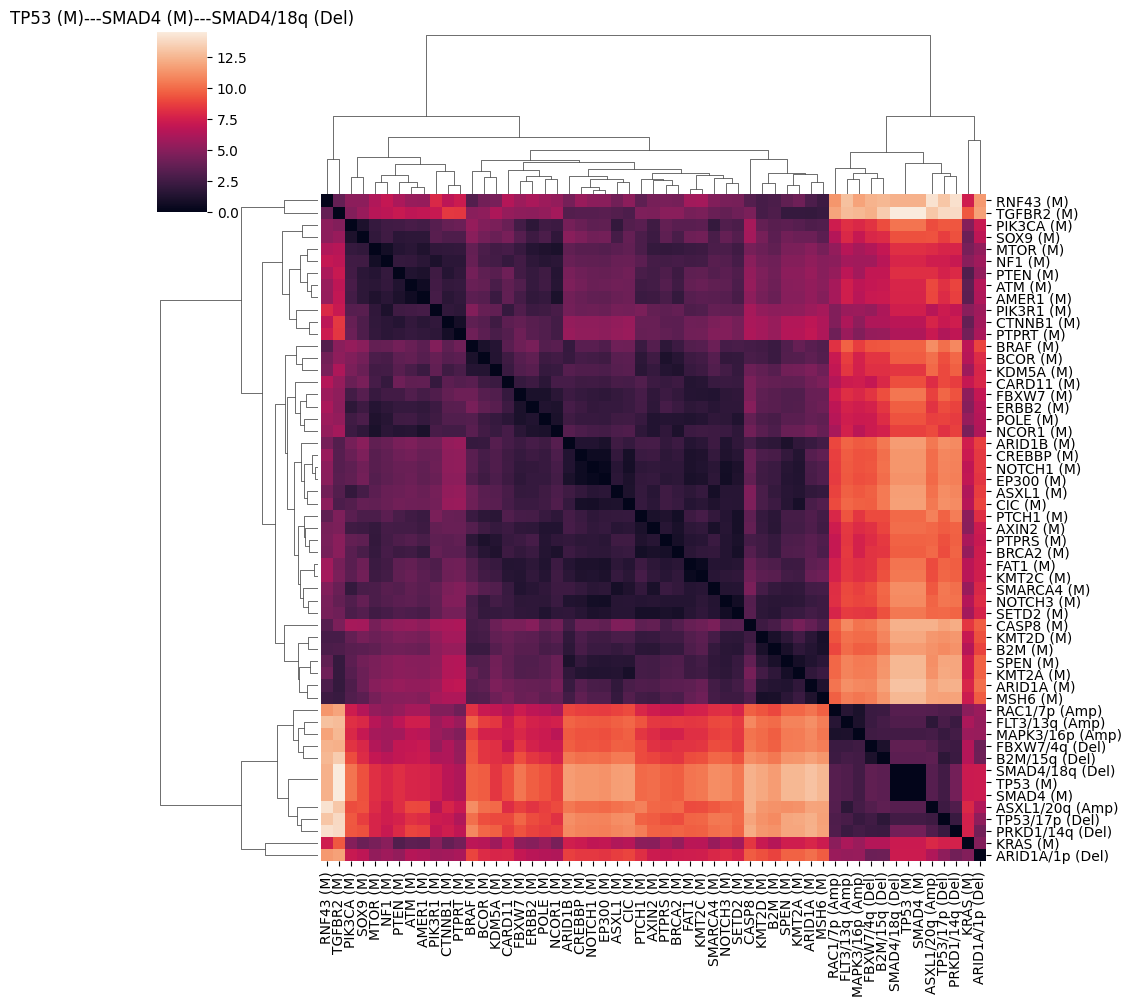

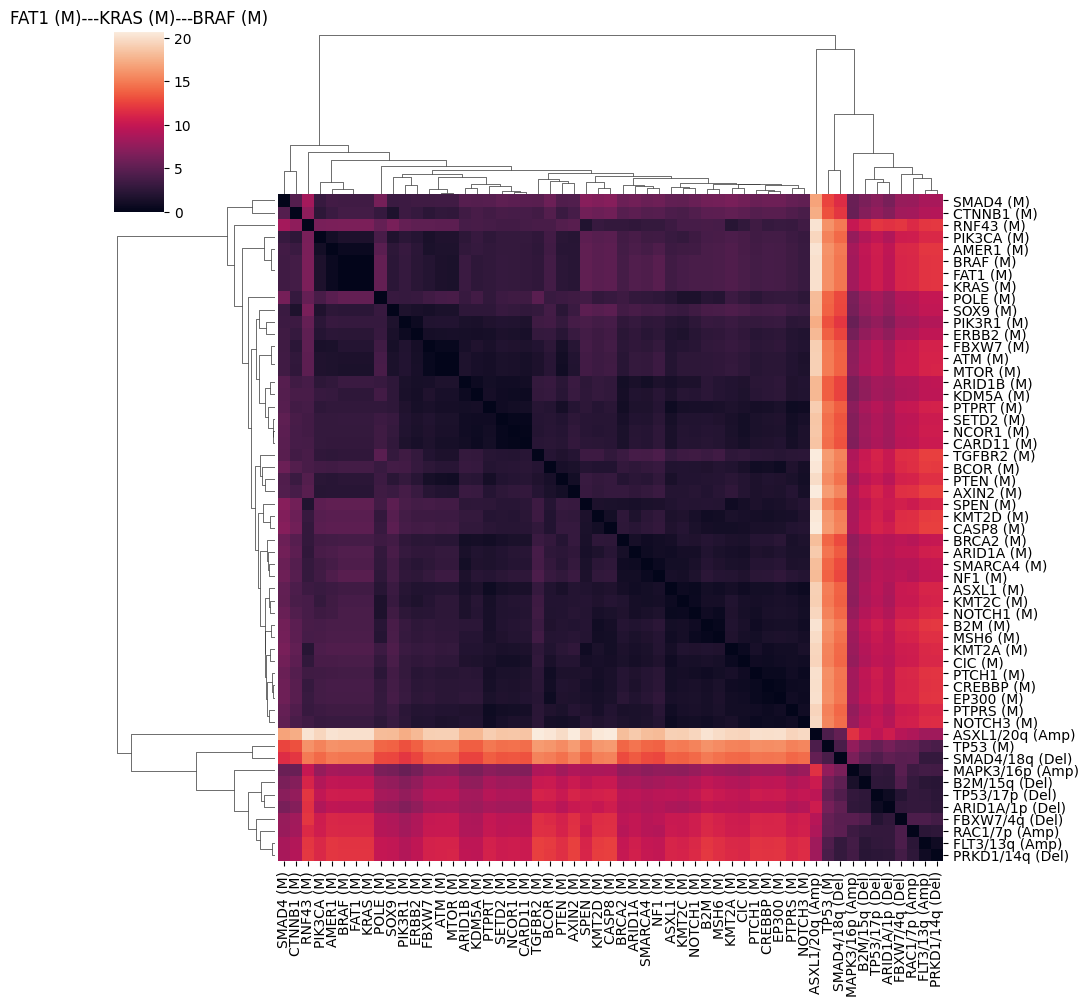

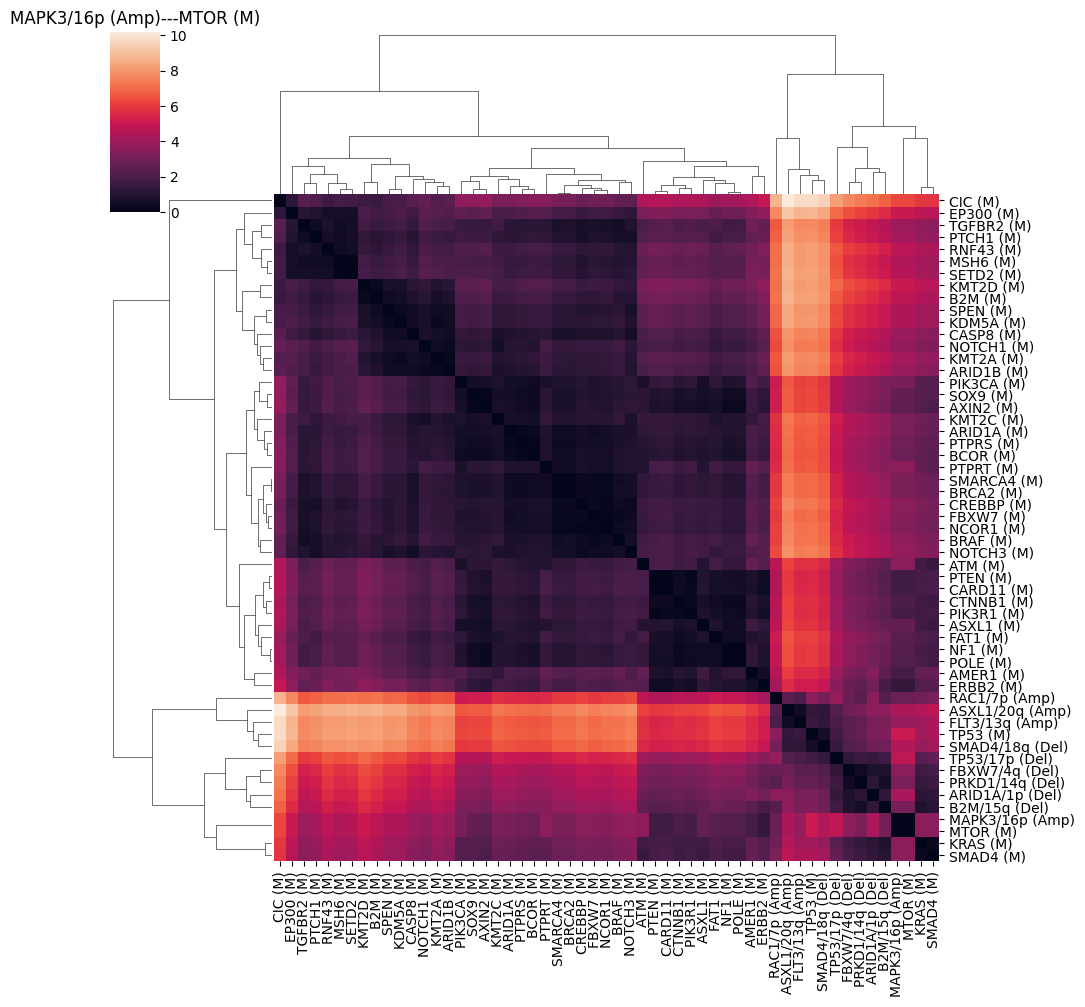

In [12]:
test_event_sets_dict={
    'LUAD':[
        ['TP53 (M)', 'RB1 (M)', 'RB1/13q (Del)'],
        ['EGFR (M)', 'MET (M)', 'KRAS (M)', 'BRAF (M)'], 
        ['STK11 (M)', 'KEAP1 (M)'] ,
        #[ 'MET (M)', 'KRAS (M)', 'BRAF (M)'], 


        #['STK11 (M)', 'KEAP1 (M)','KRAS (M)'],
        #['TP53 (M)', 'RB1 (M)', 'RB1/13q (Del)','STK11 (M)', 'KEAP1 (M)'],
        #['ATRX (M)', 'SETD2 (M)', 'BCL2/18q (Del)','SMAD4 (M)', 'PIK3CA (M)'],
        #['ATRX (M)', 'SETD2 (M)', 'BCL2/18q (Del)','SMAD4 (M)'],
        #['ATRX (M)', 'SETD2 (M)','BCL2/18q (Del)'],

        #['SMAD4 (M)', 'PIK3CA (M)','EGFR (M)'],
        #['SMAD4 (M)', 'PIK3CA (M)','MET (M)'],

        #['TP53 (M)', 'RB1 (M)', 'RB1/13q (Del)','ATRX (M)']

        ],

    'COAD':[
        ['TP53 (M)', 'SMAD4 (M)', 'SMAD4/18q (Del)'],
        ['FAT1 (M)', 'KRAS (M)', 'BRAF (M)'], 
        #['ARID1A (M)', 'ARID1B (M)','KMT2A (M)','KMT2C (M)'] ,
        ['MAPK3/16p (Amp)','MTOR (M)']
    ]
}


test_event_sets=test_event_sets_dict['COAD']
dist_measurers=[]

#print("\{"+', '.join(["\\text{"+ev+"}" for ev in test_event_sets[0]])+"\}")
for tes in test_event_sets:
    print("\{\\text{"+', '.join(tes)+"}\}")



cp.FORCE_EXECUTE_COMPUTATIONS=False

for test_event_set in test_event_sets:
    dist_measurers.append(edm.getDistMeasurer(data_input, test_event_set=test_event_set, extended_event_domain=True, identifier='no_init_theta'))

for test_event_set, dist_m in zip(test_event_sets,dist_measurers):
    sns.clustermap(dist_m._dist_mat, xticklabels=True, yticklabels=True)
    plt.title('---'.join(test_event_set),loc='center')

3
3
2


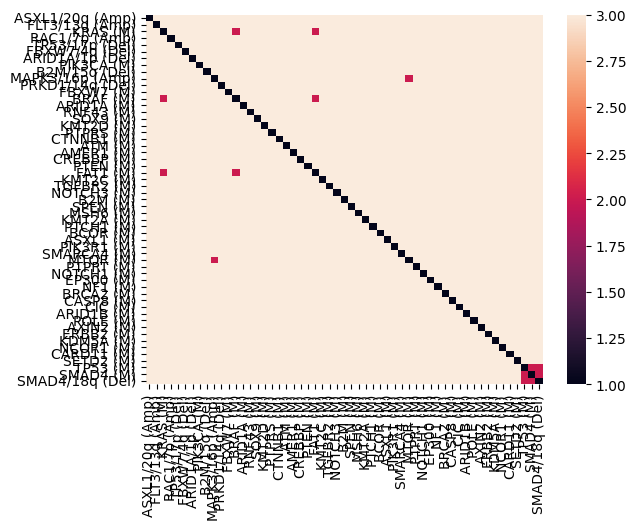

C:\Users\michi\AppData\Local\Temp\ipykernel_16040\155214481.py:39: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  mean_linkage=scipy.cluster.hierarchy.linkage(sum_dist/(count_dist), method='average')


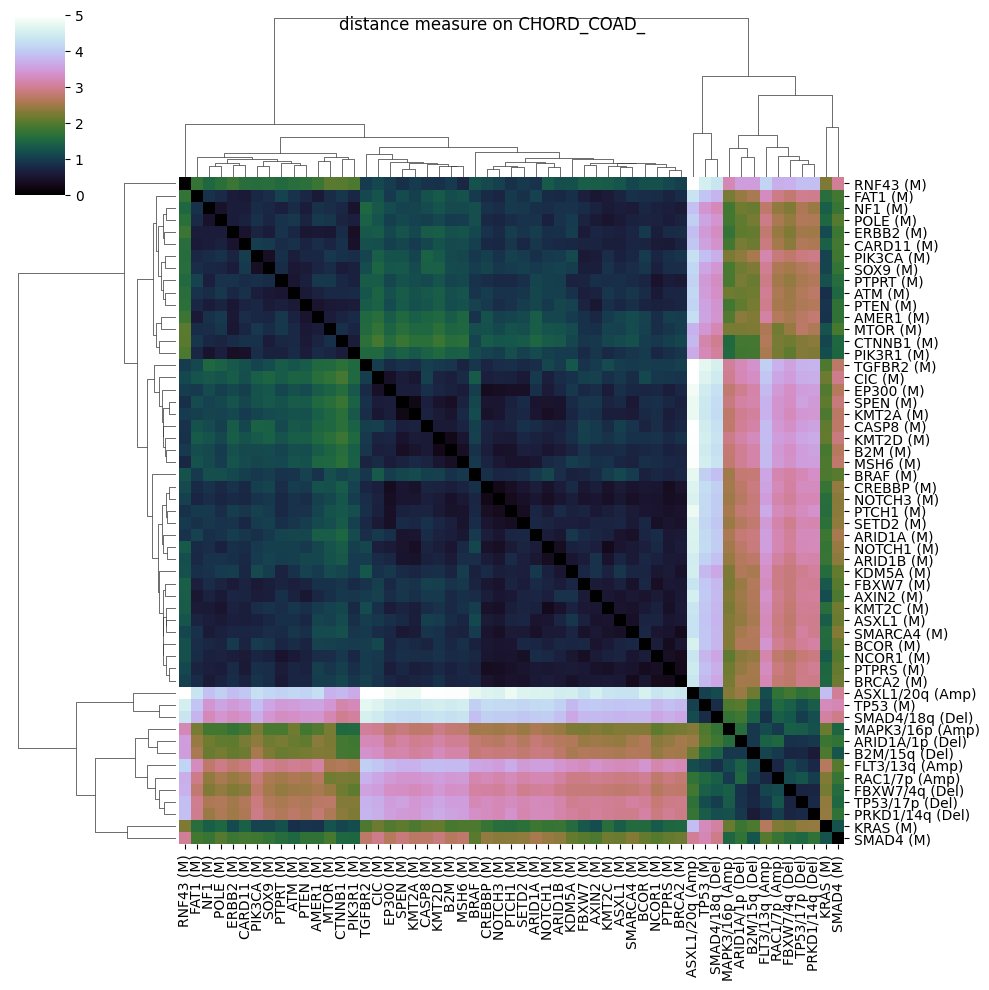

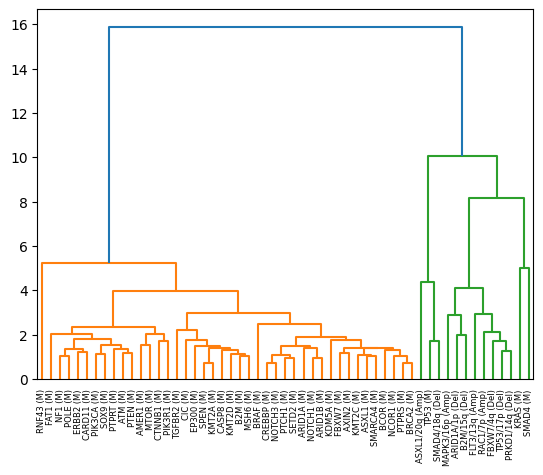

['RNF43 (M)', 'FAT1 (M)', 'NF1 (M)', 'POLE (M)', 'ERBB2 (M)', 'CARD11 (M)', 'PIK3CA (M)', 'SOX9 (M)', 'PTPRT (M)', 'ATM (M)', 'PTEN (M)', 'AMER1 (M)', 'MTOR (M)', 'CTNNB1 (M)', 'PIK3R1 (M)', 'TGFBR2 (M)', 'CIC (M)', 'EP300 (M)', 'SPEN (M)', 'KMT2A (M)', 'CASP8 (M)', 'KMT2D (M)', 'B2M (M)', 'MSH6 (M)', 'BRAF (M)', 'CREBBP (M)', 'NOTCH3 (M)', 'PTCH1 (M)', 'SETD2 (M)', 'ARID1A (M)', 'NOTCH1 (M)', 'ARID1B (M)', 'KDM5A (M)', 'FBXW7 (M)', 'AXIN2 (M)', 'KMT2C (M)', 'ASXL1 (M)', 'SMARCA4 (M)', 'BCOR (M)', 'NCOR1 (M)', 'PTPRS (M)', 'BRCA2 (M)', 'ASXL1/20q (Amp)', 'TP53 (M)', 'SMAD4/18q (Del)', 'MAPK3/16p (Amp)', 'ARID1A/1p (Del)', 'B2M/15q (Del)', 'FLT3/13q (Amp)', 'RAC1/7p (Amp)', 'FBXW7/4q (Del)', 'TP53/17p (Del)', 'PRKD1/14q (Del)', 'KRAS (M)', 'SMAD4 (M)']


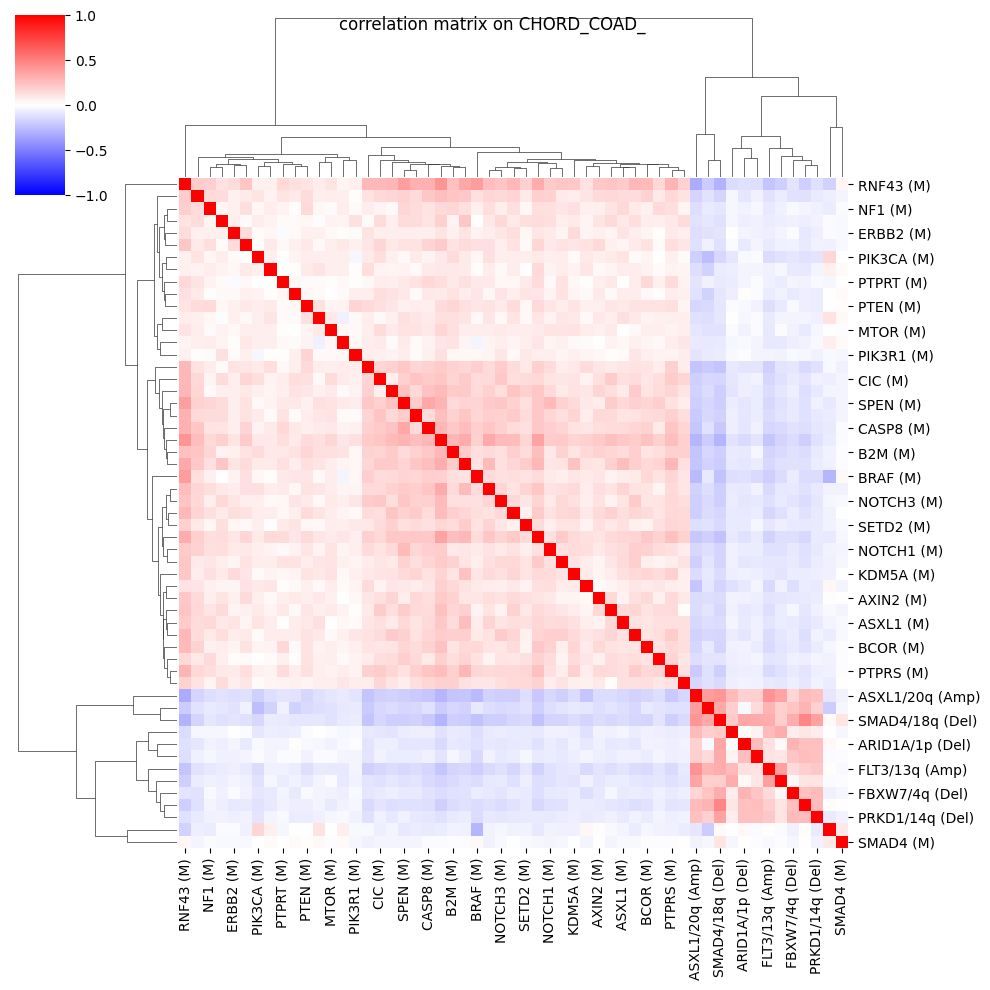

In [ ]:
import scipy.cluster


max_dist=dist_measurers[0]._dist_mat*0
sum_dist=max_dist.copy()
count_dist=sum_dist.copy()

for test_event_set,dist_m in zip(test_event_sets,dist_measurers):

    dist_mat=dist_m._dist_mat.copy()

    dist_mat.sort_index(axis=0, inplace=True)
    dist_mat.sort_index(axis=1, inplace=True)
    norm_c=len(test_event_set)
    #norm_c=np.log(len(test_event_set)+1)
    print(norm_c)

    norm_dist=dist_mat*(1/norm_c)
    max_dist = np.maximum(max_dist ,norm_dist)

    #dist_mat.loc[test_event_set,:]=0
    #dist_mat.loc[:, test_event_set]=0
    sum_dist+=norm_dist
    dist_mat.mask(dist_mat!=0, 1, inplace=True)
    count_dist += dist_mat
    #sns.heatmap(count_dist)
    #plt.show()
    
np.fill_diagonal(count_dist.values, 1)


#sns.clustermap(max_dist,cmap='cubehelix', vmax=5)
#plt.title("MAX distance combination")
#plt.show()

sns.heatmap(count_dist, xticklabels=True, yticklabels=True)
plt.show()

mean_linkage=scipy.cluster.hierarchy.linkage(sum_dist/(count_dist), method='average')
events_abc=list(count_dist.index)


sns.clustermap(sum_dist/(count_dist), xticklabels=True, yticklabels=True, row_linkage=mean_linkage, col_linkage=mean_linkage,cmap='cubehelix', vmax=5).figure.suptitle(f"distance measure on {file_names[dat_index][0:11]} ")
#plt.title("distance combination $\mathbb{T}=\{\}$")
#plt.title(''.join(f"distance measure {file_names[dat_index][0:11]} with "+"$\\mathbb{T}_{LUAD}$"), loc='right')
plt.show()

scipy.cluster.hierarchy.dendrogram(mean_linkage, labels=events_abc, leaf_rotation=90)
plt.show()
ordered_list=[events_abc[i] for i in scipy.cluster.hierarchy.leaves_list(mean_linkage)]
print(ordered_list)

cov_mat=data_input[events_abc].corr()
sns.clustermap(cov_mat,  cmap='bwr', vmax=1, vmin=-1,xticklabels=True, yticklabels=True, row_linkage=mean_linkage, col_linkage=mean_linkage).figure.suptitle(f"correlation matrix on {file_names[dat_index][0:11]} ")
plt.show()


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


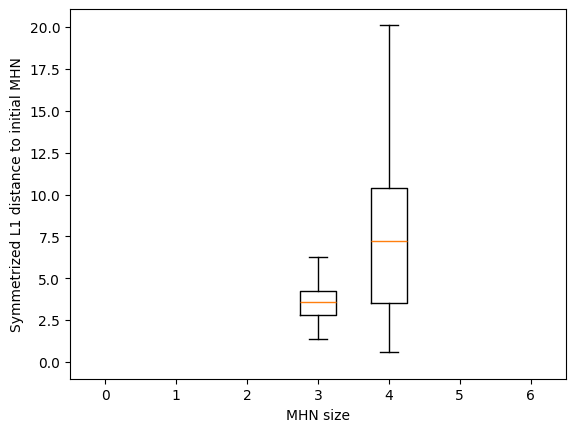

In [14]:
#plot average norm for different sizes of MHN
import cmhn_distances
mhn_norms={ }
mhn_norm_points=[]
mhn_norm_avgs=[]
for i in range(7): mhn_norms[i]=[]
for tes, dist_m in zip(test_event_sets, dist_measurers):
    n_tes=len(tes)+1
    #avg_mhn=np.average([m.log_theta for m in dist_m._mhns.values()])
    #avg_mhn=(avg_mhn+np.transpose(avg_mhn))/2
    for ev in events:

        
        #ev_mhn=dist_m._mhns[ev].log_theta.copy()
        #ev_mhn=(ev_mhn+np.transpose(ev_mhn))/2

        #np.fill_diagonal(ev_mhn,0)
        ev_mhn_norm=cmhn_distances.offdiag_l1_sym(dist_m._mhns[ev], dist_m._init_mhn)
        #ev_mhn-=dist_m._init_mhn.log_theta

        #ev_mhn-=(avg_mhn)
        #ev_mhn_norm=np.sum(np.abs(ev_mhn))
        if not ev in tes:
            mhn_norms[n_tes].append(ev_mhn_norm)
            mhn_norm_points.append((n_tes, ev_mhn_norm))
            

for n_tes in mhn_norms:
    mhn_norm_avgs.append((n_tes, np.average(mhn_norms[n_tes])))

#plt.scatter(*zip(*mhn_norm_points))    
#plt.scatter(*zip(*mhn_norm_avgs), marker='x', s=200, c='r', linewidths=10) 
#plt.show()

plt.boxplot(mhn_norms.values(), orientation='vertical')
plt.xticks(range(1, len(mhn_norms.keys()) + 1), mhn_norms.keys())
plt.xlabel('MHN size')
plt.ylabel("Symmetrized L1 distance to initial MHN")
plt.ylim(bottom=-1)
plt.show()



In [15]:
#print(dist_measurer._init_theta)

#dist_measurer._mhns['RB1 (M)'].plot()
#dist_measurer._mhns['ERBB2 (M)'].plot()


#dist_measurer._mhns['STK11 (M)'].plot(colorbar=False)
#dist_measurer._mhns['KEAP1 (M)'].plot(colorbar=False)

#dist_measurer._mhns['ARID1A (M)'].plot()
#dist_measurer._mhns['FAT1 (M)'].plot()
#dist_measurers[3]._mhns['RB1 (M)'].plot()
#dist_measurers[3]._mhns['RB1/13q (Del)'].plot()



Plot all MHNs for all test event sets and selected cluster events

In [16]:
cluster_events=[]#['PIK3CA (M)', 'SMAD4 (M)']#['ARID1A (M)','ARID2 (M)','SMARCA4 (M)','KMT2D (M)','ATRX (M)','FAT1 (M)','APC (M)']

for ev in cluster_events:
    mytools.plotMHNgroup([dist_m._mhns[ev] for dist_m in dist_measurers], identifier="LUAD")
    plt.show()

Compare the above results to the more simple approach of plotting the covariance of each pair of events

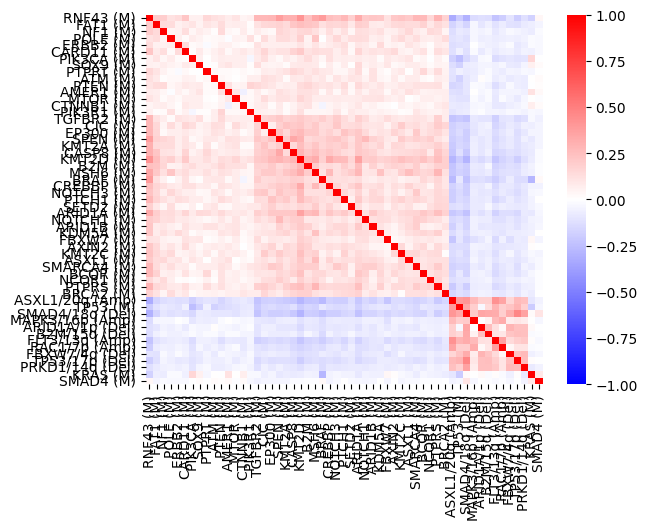

In [17]:
cov_mat=data_input[ordered_list].corr()
sns.heatmap(cov_mat, xticklabels=True, yticklabels=True, cmap='bwr', vmax=1, vmin=-1 )
plt.show()
#cov_dist_mat=1/(cov_mat*cov_mat+0.00001)
cov_dist_mat=1-(np.sqrt(cov_mat.abs()))

#sns.clustermap(cov_dist_mat )

# 
# np.cov(m=data_input, rowvar=False)

In [18]:
sub_ev_clusters=[
    ['FAT1 (M)','ARID1A (M)','ARID2 (M)','APC (M)','KMT2D (M)', 'NF1 (M)'],
    ['TERT/5p (Amp)','TP53 (M)','ERBB2 (M)', 'EGFR/7p (Amp)', 'MET (M)'],
    ['CDKN2A/9p (Del)', 'BCL2/18q (Del)','RB1/13q (Del)', 'RB1 (M)','PIK3CA (M)','SMAD4 (M)'],
    ['STK11 (M)','KEAP1 (M)', 'KRAS (M)']]
sub_cov_mats=[]
for sec in sub_ev_clusters:
    sub_cov_mats.append(data_input[sec].corr())

for scm in sub_cov_mats:
    sns.heatmap(scm, xticklabels=True, yticklabels=True, cmap='bwr', vmax=1, vmin=-1 )
    plt.show()




KeyError: "['ARID2 (M)'] not in index"

0.00038684719535783365


c:\Users\michi\Desktop\Uni\Bachelorarbeit\ws24_mbonart_mhn-feature-clustering\.venv\Lib\site-packages\mhn\model.py:570: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(


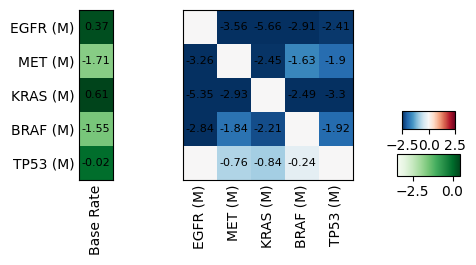

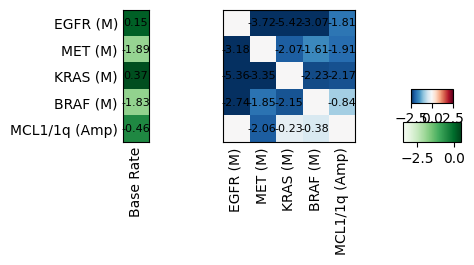

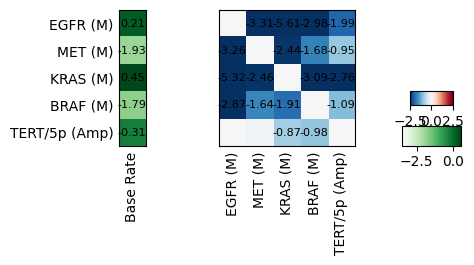

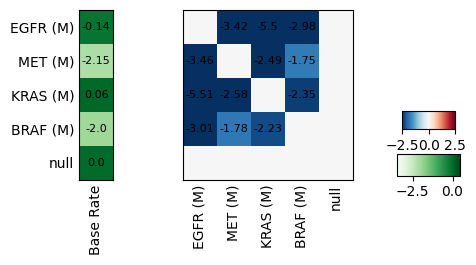

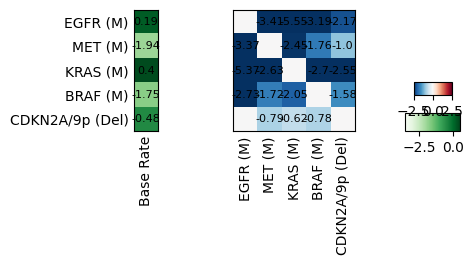

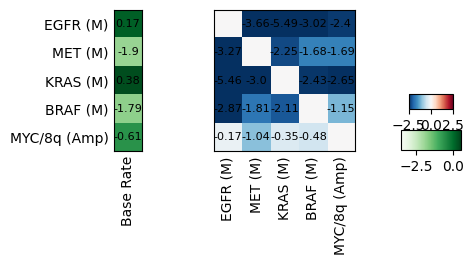

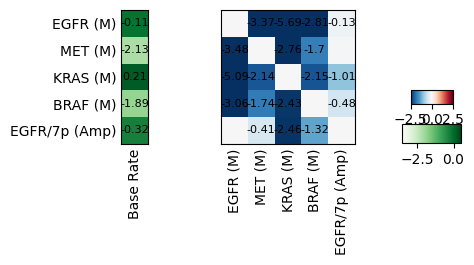

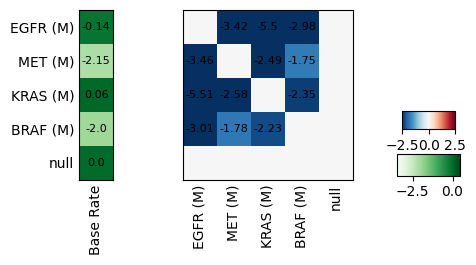

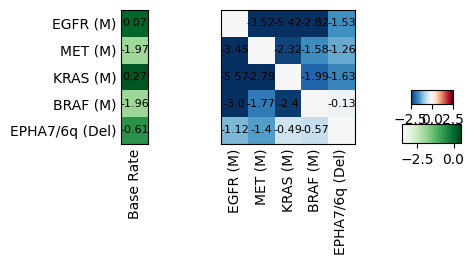

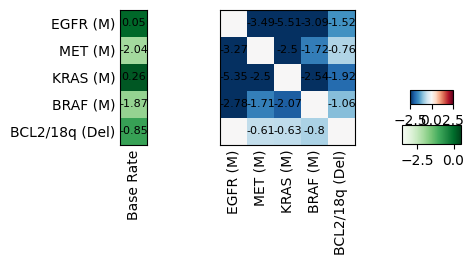

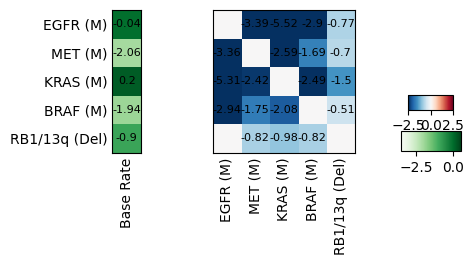

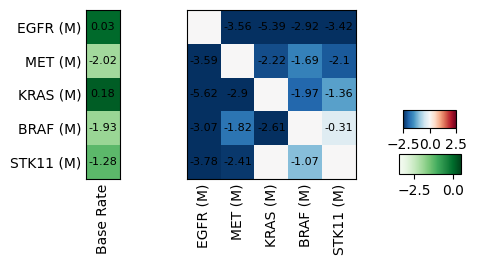

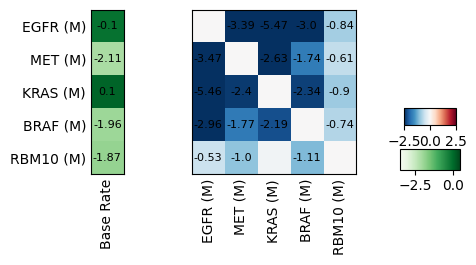

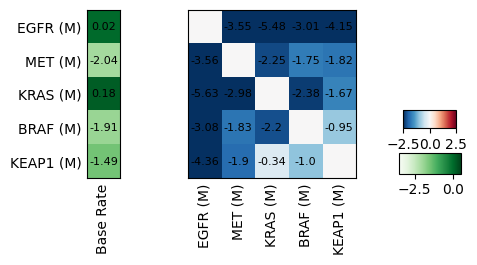

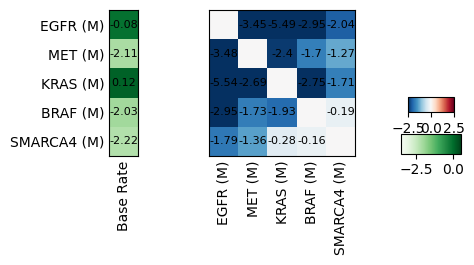

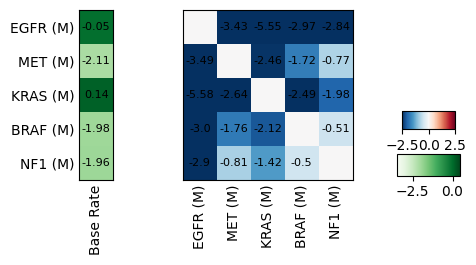

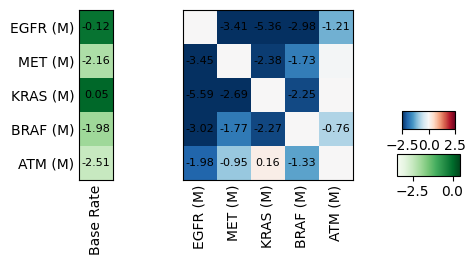

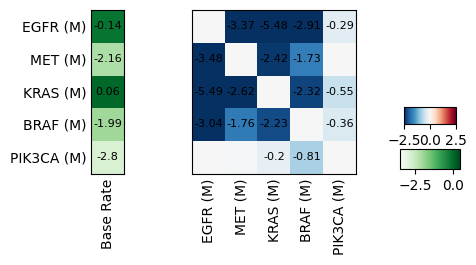

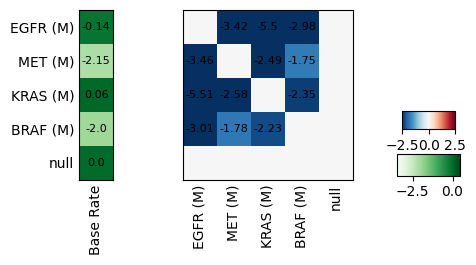

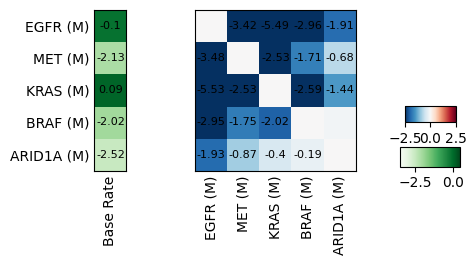

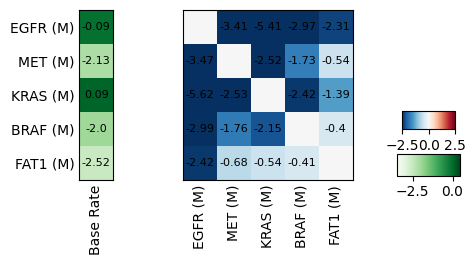

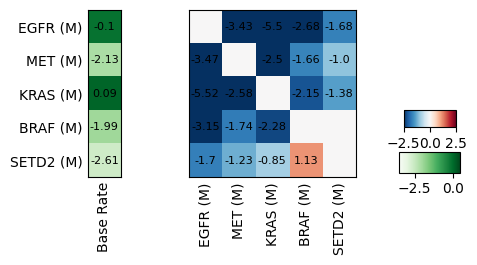

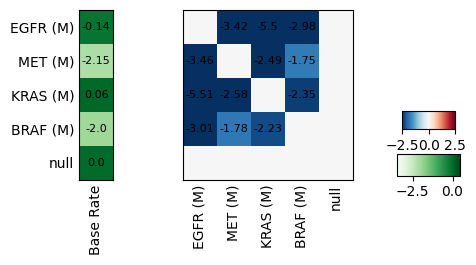

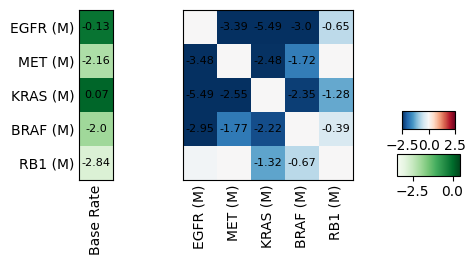

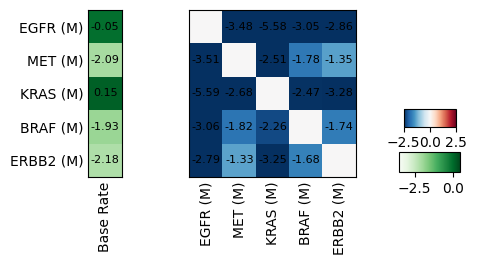

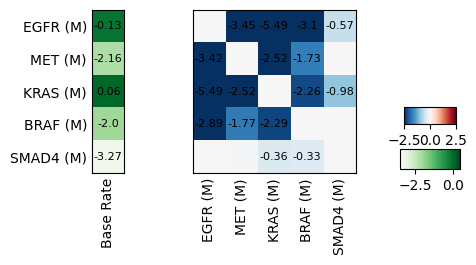

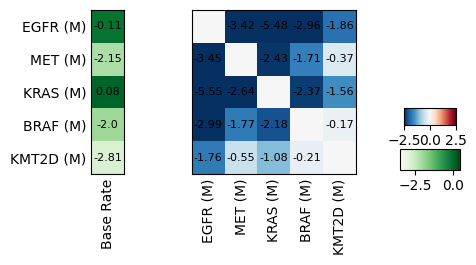

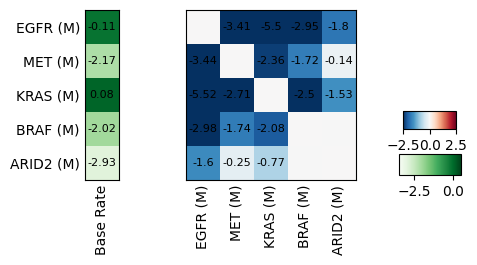

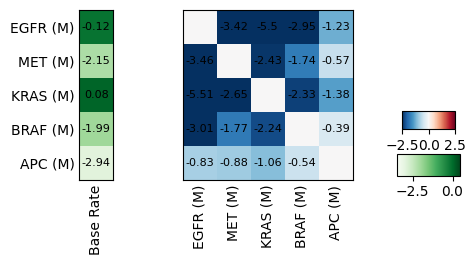

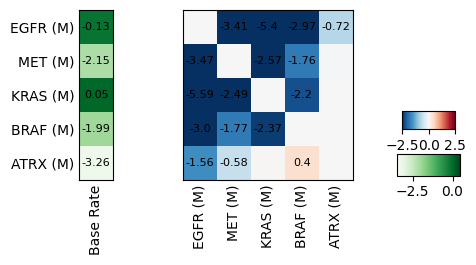

In [ ]:
#print(dist_measurer._lam_test)
print(1/len(data_input))

for ev in events:
    dist_measurers[1]._mhns[ev].plot()